In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import tensorflow as tf

In [2]:
#import CSV file
white_df = pd.read_csv('../Resources/Data/winequality-white.csv', delimiter=';')
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# drop duplicate data
white_df = white_df.drop_duplicates(keep = 'first', inplace = False)
white_df = white_df.dropna(axis = 'columns', how='all')
white_df = white_df.reset_index(drop = True)
#white_df

In [4]:
white_stats = white_df.describe()
white_stats.drop(["count"], axis=0, inplace=True)
white_stats.T

,mean,std,min,25%,50%,75%,max
fixed acidity,6.839346,0.866860,3.80000,6.30000,6.8000,7.30000,14.20000
volatile acidity,0.280538,0.103437,0.08000,0.21000,0.2600,0.33000,1.10000
citric acid,0.334332,0.122446,0.00000,0.27000,0.3200,0.39000,1.66000
residual sugar,5.914819,4.861646,0.60000,1.60000,4.7000,8.90000,65.80000
chlorides,0.045905,0.023103,0.00900,0.03500,0.0420,0.05000,0.34600
free sulfur dioxide,34.889169,17.210021,2.00000,23.00000,33.0000,45.00000,289.00000
total sulfur dioxide,137.193512,43.129065,9.00000,106.00000,133.0000,166.00000,440.00000
density,0.993790,0.002905,0.98711,0.99162,0.9935,0.99571,1.03898
pH,3.195458,0.151546,2.72000,3.09000,3.1800,3.29000,3.82000
sulphates,0.490351,0.113523,0.22000,0.41000,0.4800,0.55000,1.08000


In [5]:
#datatype 
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 371.5 KB


In [6]:
# check for null values
white_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
white_df.shape

(3961, 12)

In [8]:
white_df['quality'].value_counts()

6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64

In [9]:
# Features for Quality
bins = [2,6,9]
group_names = ['Fair','Very Good']
white_df['quality'] = pd.cut(white_df['quality'], bins, labels = group_names)

In [10]:
X = white_df.drop("quality", axis =1)
y = white_df["quality"]

In [11]:
white_df['quality'].value_counts()

Fair         3136
Very Good     825
Name: quality, dtype: int64

In [12]:
# Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
#model = ExtraTreesClassifier()
#model.fit(X,y)
#print(model.feature_importances_)

#feat_importances = pd.Series(model.feature_importances_, index = X.columns)
#feat_importances.nlargest(10).plot(kind= "barh" , color = "#EEEDC4")
#plt.savefig('Resources/images/white_features_importance.jpg')
#plt.show()

In [13]:
#feat_importances.sort_values(ascending=False)

# Create a Train Test Split 

## All Features

In [ ]:
# Split the data using train_test_split
# create the train and validation datasets

from sklearn.model_selection import train_test_split
X_train, X_left, y_train, y_left = train_test_split(X, y, train_size=.7)
X_val, X_test, y_val, y_test = train_test_split(X_left, y_left, train_size=.7)

In [ ]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

# Pre-pocessing 

In [ ]:
# Scale the data using the StandardScaler 
X_scale = StandardScaler().fit(X_train)

In [ ]:
X_train_scaled = X_scale.transform(X_train)
X_test_scaled = X_scale.transform(X_test)

In [ ]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [ ]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Train the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Create model and add layers
deep_model = Sequential()
deep_model.add(Dense(units=20, activation='relu', input_dim=11))
deep_model.add(Dense(units=10, activation='relu'))
deep_model.add(Dense(units=2, activation='sigmoid'))

In [ ]:
# Compile and fit the model
deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
deep_model.summary()

In [ ]:
#deep_model.get_config()

In [ ]:
# fit model
history = deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    validation_split=.2 ,
    epochs=30,
    shuffle=True,
    verbose=2,
    validation_data=(X_test_scaled, y_test_categorical)
)

# Quantify our Trained Model

In [ ]:
#evaluate the model
deep_model_loss, deep_model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")

# Make Predictions

In [ ]:
#from sklearn.metrics import classification_report

#encoded_predictions=np.argmax(deep_model.predict(X_test_scaled), axis=-1)
#prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [ ]:
#print(f"Predicted classes: {prediction_labels}")
#print(f"Actual Labels: {list(y_test[:5])}")

In [ ]:
y_pred = deep_model.predict(X_test_scaled)
y_pred[:5], y_test_categorical[:5]

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred = y_pred.round()

print(confusion_matrix(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1)))

## Results - All Features

In [ ]:
# Plot Confusion Matrix - all features

label_aux = plt.subplot()
cm_dl_white = confusion_matrix(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1))
cm_dl = pd.DataFrame(cm_dl_white,
                     index = ['Fair','Very Good'], 
                     columns = ['Fair','Very Good'])
sns.heatmap(cm_dl,annot=True,cmap=plt.cm.YlGnBu,fmt='3')
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');
label_aux.set_title('Normalized (All Features)')
#plt.savefig('Resources/images/dl_white_cm_nor_all.jpg');
plt.show()

In [ ]:
# Plot Loss during training - all features
from matplotlib import pyplot
#pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
#plt.savefig('Resources/images/dl_loss_white_all.jpg')
plt.show()

In [ ]:
# plot accuracy during training
from matplotlib import pyplot
#pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
#plt.savefig('Resources/images/dl_accuracy_white_all.jpg')
pyplot.show()

# Save the Model

In [ ]:
# Save the Model (test all features, selected features)

#filename = 'Resources/results/dl_white_all.h5'

# Create a Train Test Split 
## Top 5 Features

In [14]:
# Selected important features - top 5
selected_features = X[['alcohol', 'density','free sulfur dioxide','residual sugar','pH']]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_left, y_train, y_left = train_test_split(selected_features,y, train_size=.7)
X_val, X_test, y_val, y_test = train_test_split(X_left, y_left, train_size=.7)

In [16]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((2772, 5), (832, 5), (357, 5), (2772,), (832,), (357,))

# Pre-pocessing 

In [17]:
# Scale the data using the StandardScaler and perform some feature selection
X_scale = StandardScaler().fit(X_train)

In [18]:
X_train_scaled = X_scale.transform(X_train)
X_test_scaled = X_scale.transform(X_test)

In [19]:
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape)

(2772, 5) (357, 5) (2772,)


In [20]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [21]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Train the Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
# Create model and add layers
deep_model = Sequential()
deep_model.add(Dense(units=20, activation='relu', input_dim=5))
deep_model.add(Dense(units=20, activation='relu'))
deep_model.add(Dense(units=2, activation='sigmoid'))

In [24]:
# Compile and fit the model
deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
deep_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________


In [26]:
# fit model
history = deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    validation_split=.2 ,
    epochs=30,
    shuffle=True,
    verbose=2,
    validation_data=(X_test_scaled, y_test_categorical)
)

Epoch 1/30
70/70 - 0s - loss: 0.4947 - accuracy: 0.7812 - val_loss: 0.4675 - val_accuracy: 0.7928
Epoch 2/30
70/70 - 0s - loss: 0.4145 - accuracy: 0.8088 - val_loss: 0.4536 - val_accuracy: 0.7910
Epoch 3/30
70/70 - 0s - loss: 0.3975 - accuracy: 0.8236 - val_loss: 0.4502 - val_accuracy: 0.7892
Epoch 4/30
70/70 - 0s - loss: 0.3935 - accuracy: 0.8191 - val_loss: 0.4510 - val_accuracy: 0.7982
Epoch 5/30
70/70 - 0s - loss: 0.3906 - accuracy: 0.8232 - val_loss: 0.4516 - val_accuracy: 0.7910
Epoch 6/30
70/70 - 0s - loss: 0.3895 - accuracy: 0.8236 - val_loss: 0.4514 - val_accuracy: 0.7910
Epoch 7/30
70/70 - 0s - loss: 0.3877 - accuracy: 0.8236 - val_loss: 0.4510 - val_accuracy: 0.7928
Epoch 8/30
70/70 - 0s - loss: 0.3861 - accuracy: 0.8286 - val_loss: 0.4474 - val_accuracy: 0.7928
Epoch 9/30
70/70 - 0s - loss: 0.3850 - accuracy: 0.8259 - val_loss: 0.4474 - val_accuracy: 0.7964
Epoch 10/30
70/70 - 0s - loss: 0.3845 - accuracy: 0.8272 - val_loss: 0.4503 - val_accuracy: 0.7964
Epoch 11/30
70/70 -

# Quantify our Trained Model

In [27]:
#evaluate the model
deep_model_loss, deep_model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")

12/12 - 0s - loss: 0.3867 - accuracy: 0.8179
Normal Neural Network - Loss: 0.38668525218963623, Accuracy: 0.8179271817207336


# Make Predictions

In [28]:
#encoded_predictions = deep_model.predict_classes(X_test_scaled[:5])
encoded_predictions=np.argmax(deep_model.predict(X_test_scaled[:5]), axis=-1)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [29]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: ['Fair' 'Fair' 'Fair' 'Fair' 'Very Good']
Actual Labels: ['Very Good', 'Fair', 'Fair', 'Fair', 'Fair']


In [31]:
y_pred = deep_model.predict(X_test_scaled)
y_pred[:5], y_test_categorical[:5]

(array([[0.63648856, 0.5020182 ],
        [0.80649096, 0.24477124],
        [0.685776  , 0.3086305 ],
        [0.7684678 , 0.41128856],
        [0.53133756, 0.5685638 ]], dtype=float32),
 array([[0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]], dtype=float32))

In [32]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
y_pred = y_pred.round()

print(confusion_matrix(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1)))

[[269  14]
 [ 51  23]]


##  Results

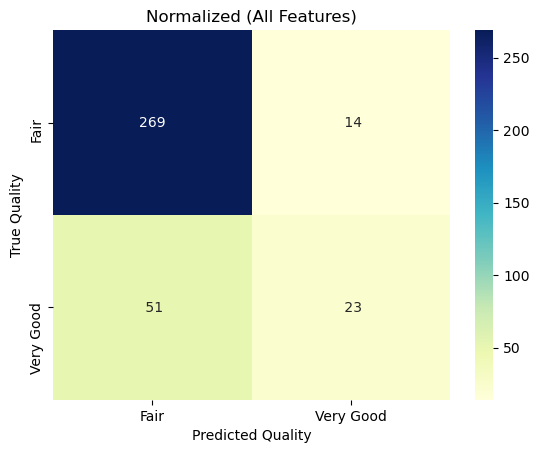

In [33]:
# Plot Confusion Matrix - Top 5 Features
label_aux = plt.subplot()
cm_dl_white = confusion_matrix(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1))
cm_dl = pd.DataFrame(cm_dl_white,
                     index = ['Fair','Very Good'], 
                     columns = ['Fair','Very Good'])
sns.heatmap(cm_dl,annot=True,cmap=plt.cm.YlGnBu,fmt='3')
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');
label_aux.set_title('Normalized (All Features)')
#plt.savefig('Resources/images/dl_white_cm_nor_selected.jpg');
plt.show()

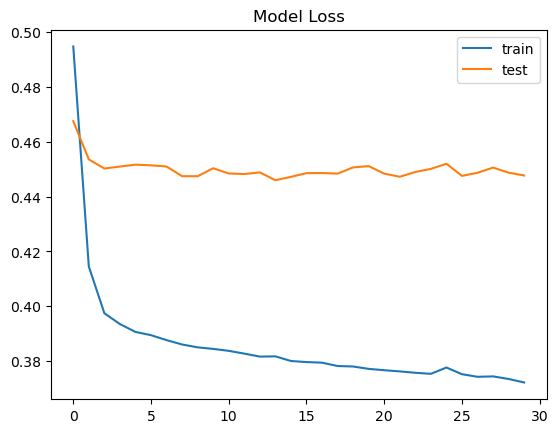

In [34]:
# Plot Loss during training - Top5 Features

from matplotlib import pyplot
#pyplot.subplot(211)
pyplot.title('Model Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
#plt.savefig('Resources/images/dl_loss_white_selected.jpg')
plt.show()

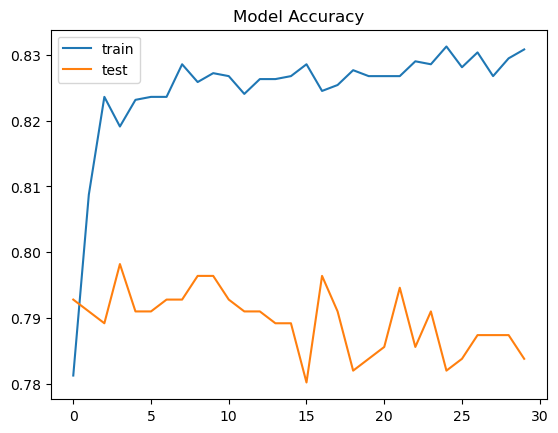

In [35]:
# Plot Loss during Accuracy - Top5 Features

from matplotlib import pyplot
#pyplot.subplot(212)
pyplot.title('Model Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
#plt.savefig('Resources/images/dl_accuracy_white_selected.jpg')
pyplot.show()

# Save the Model

In [36]:
# Save the Model (test all features, selected features)
#filename = 'Resources/results/dl_white_selected.h5'